<a href="https://colab.research.google.com/github/mikailachmad/Pengolahan-Citra-Digital/blob/main/%3CMikail_Achmad%3E_%3C24_542370_PA_23026%3E_Segmentation_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter, ImageEnhance

In [31]:
ori_1 = "/content/ori_1.png"
ori_2 = "/content/ori_2.png"
ori_3 = "/content/ori_3.png"

In [32]:
mask_1 = "/content/mask_1.png"
mask_2 = "/content/mask_2.png"
mask_3 = "/content/mask_3.png"

In [33]:
originals = [ori_1, ori_2, ori_3]
masks_paths = [mask_1, mask_2, mask_3]

original_images = []
masks = []
grayscale_images = []
blurred_images = []
contrast_images = []

for ori_path, mask_path in zip(originals, masks_paths):
    original_image = Image.open(ori_path)
    original_images.append(original_image)

    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    masks.append(mask)

# Step 2

In [34]:
for original_image in original_images:
    # Grayscale
    grayscale_image = original_image.convert('L')
    grayscale_images.append(grayscale_image)

    # Gaussian blur (PIL)
    blurred_image = grayscale_image.filter(ImageFilter.GaussianBlur(radius=1.5))
    blurred_images.append(blurred_image)

    # Contrast enhance (PIL)
    contrast_enhacer = ImageEnhance.Contrast(grayscale_image)
    contrast_enhanced_image = contrast_enhacer.enhance(1.8)
    contrast_images.append(contrast_enhanced_image)

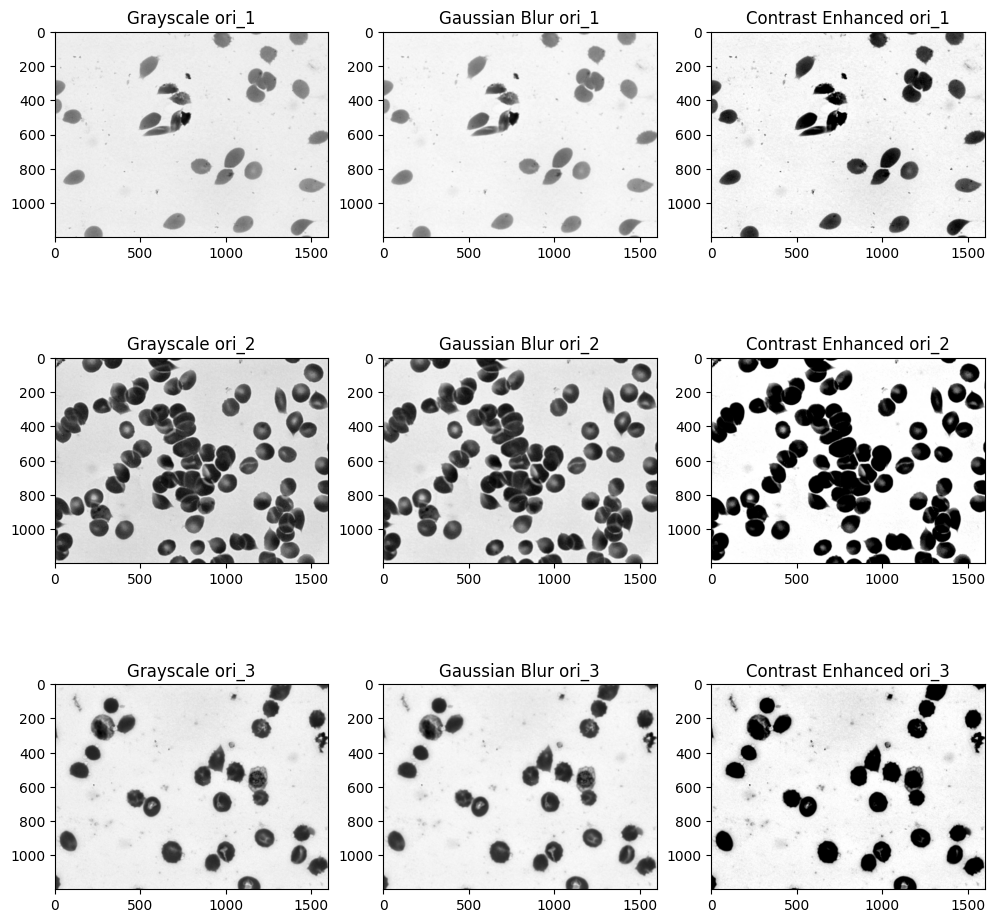

In [40]:
plt.figure(figsize=(12,12))

plt.subplot(3,3,1)
plt.imshow(grayscale_images[0], cmap='gray')
plt.title("Grayscale ori_1")

plt.subplot(3,3,2)
plt.imshow(blurred_images[0], cmap='gray')
plt.title("Gaussian Blur ori_1")

plt.subplot(3,3,3)
plt.imshow(contrast_images[0], cmap='gray')
plt.title("Contrast Enhanced ori_1")

plt.subplot(3,3,4)
plt.imshow(grayscale_images[1], cmap='gray')
plt.title("Grayscale ori_2")

plt.subplot(3,3,5)
plt.imshow(blurred_images[1], cmap='gray')
plt.title("Gaussian Blur ori_2")

plt.subplot(3,3,6)
plt.imshow(contrast_images[1], cmap='gray')
plt.title("Contrast Enhanced ori_2")

plt.subplot(3,3,7)
plt.imshow(grayscale_images[2], cmap='gray')
plt.title("Grayscale ori_3")

plt.subplot(3,3,8)
plt.imshow(blurred_images[2], cmap='gray')
plt.title("Gaussian Blur ori_3")

plt.subplot(3,3,9)
plt.imshow(contrast_images[2], cmap='gray')
plt.title("Contrast Enhanced ori_3")

plt.show()

In [ ]:
grayscale_arrays = [np.array(img) for img in grayscale_images]
blurred_arrays = [np.array(img) for img in blurred_images]
contrast_enhanced_arrays = [np.array(img) for img in contrast_images]

# Step 3

In [49]:
otsu_binary_results = []
otsu_cleaned_results = []
otsu_threshold_values = []

for blurred_array in blurred_arrays:
  # Otsu Thresholding + Morphology
  otsu_threshold_value, otsu_binary_result = cv2.threshold(
      blurred_array, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

  # Balik Warna
  otsu_binary_result = cv2.bitwise_not(otsu_binary_result)

  # Morphology
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
  otsu_cleaned = cv2.morphologyEx(otsu_binary_result, cv2.MORPH_CLOSE, kernel)
  otsu_cleaned = cv2.morphologyEx(otsu_cleaned, cv2.MORPH_OPEN, kernel)

  otsu_binary_results.append(otsu_binary_result)
  otsu_cleaned_results.append(otsu_cleaned)
  otsu_threshold_values.append(otsu_threshold_value)

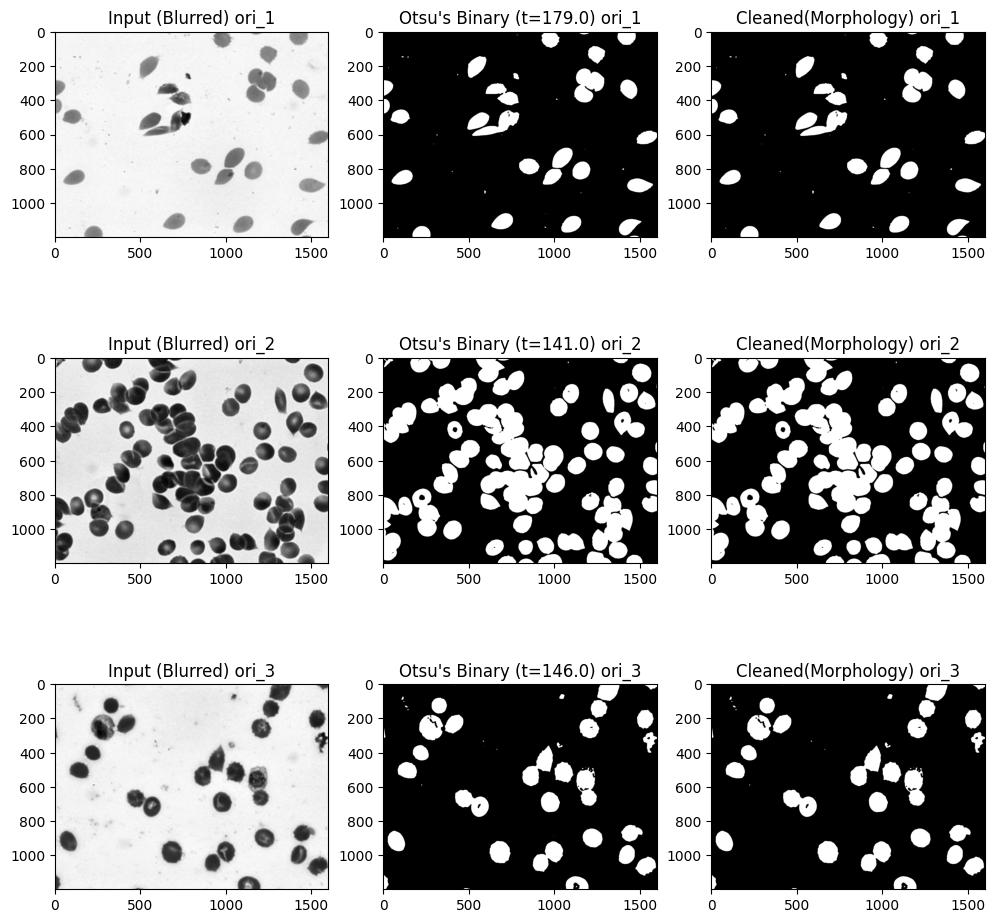

In [50]:
plt.figure(figsize=(12,12))

plt.subplot(3,3,1)
plt.imshow(blurred_arrays[0], cmap='gray')
plt.title("Input (Blurred) ori_1")

plt.subplot(3,3,2)
plt.imshow(otsu_binary_results[0], cmap='gray')
plt.title(f"Otsu's Binary (t={otsu_threshold_values[0]}) ori_1")

plt.subplot(3,3,3)
plt.imshow(otsu_cleaned_results[0], cmap='gray')
plt.title("Cleaned(Morphology) ori_1")

plt.subplot(3,3,4)
plt.imshow(blurred_arrays[1], cmap='gray')
plt.title("Input (Blurred) ori_2")

plt.subplot(3,3,5)
plt.imshow(otsu_binary_results[1], cmap='gray')
plt.title(f"Otsu's Binary (t={otsu_threshold_values[1]}) ori_2")

plt.subplot(3,3,6)
plt.imshow(otsu_cleaned_results[1], cmap='gray')
plt.title("Cleaned(Morphology) ori_2")

plt.subplot(3,3,7)
plt.imshow(blurred_arrays[2], cmap='gray')
plt.title("Input (Blurred) ori_3")

plt.subplot(3,3,8)
plt.imshow(otsu_binary_results[2], cmap='gray')
plt.title(f"Otsu's Binary (t={otsu_threshold_values[2]}) ori_3")

plt.subplot(3,3,9)
plt.imshow(otsu_cleaned_results[2], cmap='gray')
plt.title("Cleaned(Morphology) ori_3")

plt.show()

# Step 4

In [52]:
bilateral_filtered_images = []
canny_otsu_edges_results = []

for i in range(len(grayscale_arrays)):
    # Bilateral Filter
    bilateral_filtered_image = cv2.bilateralFilter(grayscale_arrays[i], 9, 75, 75)
    bilateral_filtered_images.append(bilateral_filtered_image)

    # Canny Otsu-based
    canny_otsu_edges = cv2.Canny(bilateral_filtered_image, otsu_threshold_values[i] * 0.5, otsu_threshold_values[i])
    canny_otsu_edges_results.append(canny_otsu_edges)

In [54]:
canny_median_edges_results = []
canny_dilated_edges_results = []

for bilateral_filtered_image in bilateral_filtered_images:
    # Canny Median-based thresholds
    median_intensity = np.median(bilateral_filtered_image)
    canny_lower_threshold = int(max(0, 0.5 * median_intensity))
    canny_upper_threshold = int(min(255, 1.5 * median_intensity))

    canny_median_edges = cv2.Canny(bilateral_filtered_image, canny_lower_threshold, canny_upper_threshold)

    # Dilasi edges
    edge_dilation_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2,2))
    canny_dilated_edges = cv2.dilate(canny_median_edges, edge_dilation_kernel, iterations=1)

    canny_median_edges_results.append(canny_median_edges)
    canny_dilated_edges_results.append(canny_dilated_edges)

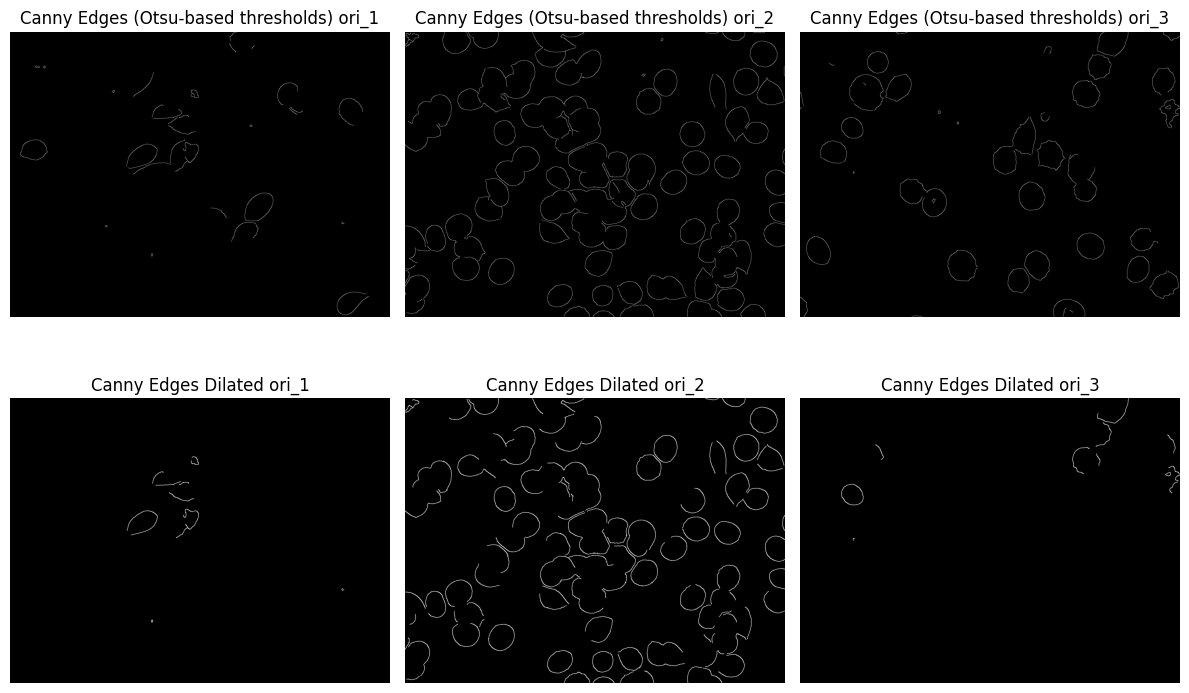

In [59]:
plt.figure(figsize=(12, 8))

for i in range(len(canny_otsu_edges_results)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(canny_otsu_edges_results[i], cmap='gray')
    plt.title(f'Canny Edges (Otsu-based thresholds) ori_{i+1}')
    plt.axis("off")

    plt.subplot(2, 3, i + 4)
    plt.imshow(canny_dilated_edges_results[i], cmap='gray')
    plt.title(f'Canny Edges Dilated ori_{i+1}')
    plt.axis("off")

plt.tight_layout()
plt.show()

# Step 5

In [62]:
otsu_contours_results = []
otsu_contour_images = []
mask_contours_results = []
mask_contour_images = []

for i in range(len(otsu_cleaned_results)):
    # Contour detection from Otsu results
    contours_otsu, _ = cv2.findContours(
        otsu_cleaned_results[i], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )
    otsu_contours_results.append(contours_otsu)

    # Draw contours on original image
    ori_contour = original_images[i].copy()
    ori_contour_cv = cv2.cvtColor(np.array(ori_contour), cv2.COLOR_RGB2BGR)
    cv2.drawContours(ori_contour_cv, contours_otsu, -1, (0,255,0), 2)
    otsu_contour_images.append(ori_contour_cv)

    # Contour detection from Mask Ground Truth
    mask_array = np.array(masks[i])
    contours_mask, _ = cv2.findContours(mask_array, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    mask_contours_results.append(contours_mask)

    mask_contour = cv2.cvtColor(mask_array, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(mask_contour, contours_mask, -1, (0,0,255), 2)  # Red: GT
    mask_contour_images.append(mask_contour)

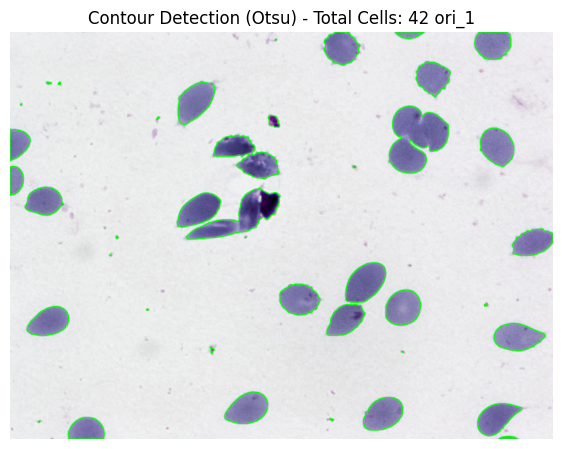

Jumlah sel terdeteksi (Otsu segmentation) ori_1: 42


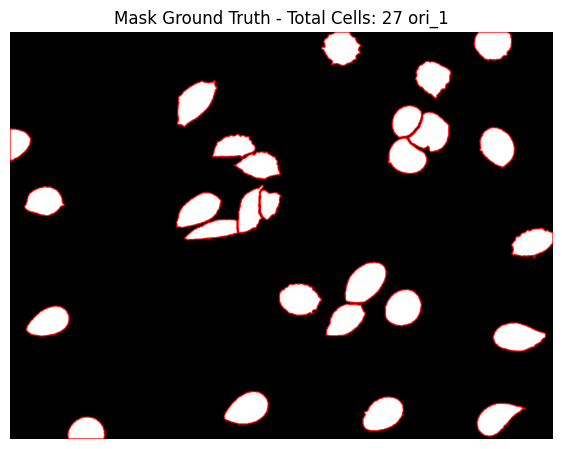

Jumlah sel ground truth (mask) ori_1: 27


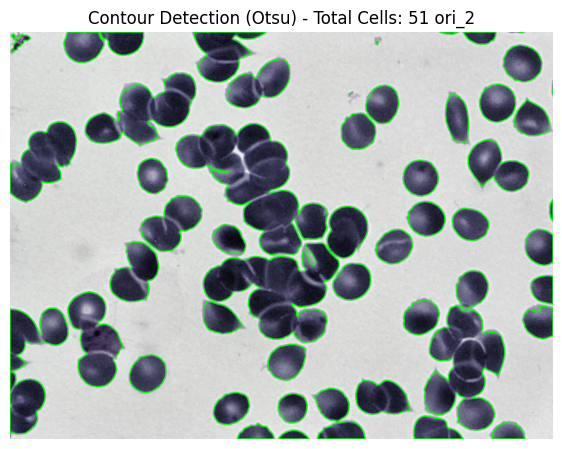

Jumlah sel terdeteksi (Otsu segmentation) ori_2: 51


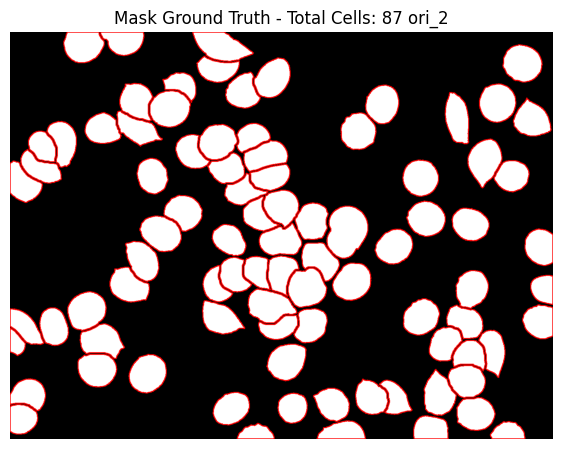

Jumlah sel ground truth (mask) ori_2: 87


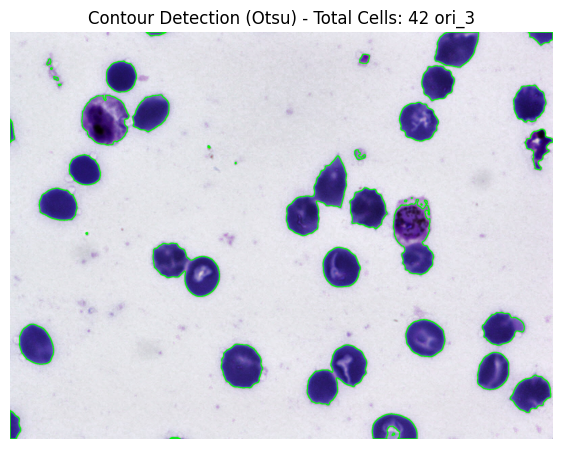

Jumlah sel terdeteksi (Otsu segmentation) ori_3: 42


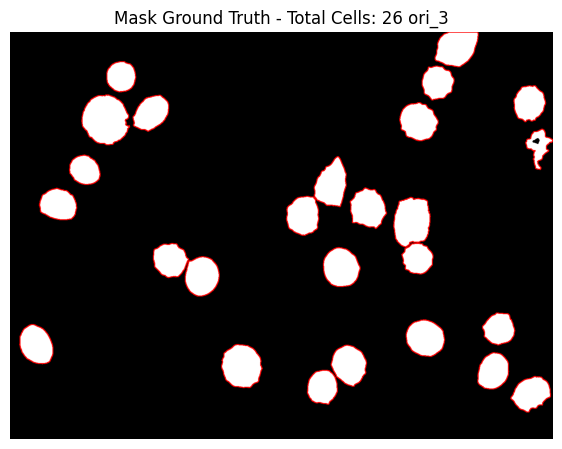

Jumlah sel ground truth (mask) ori_3: 26


In [63]:
for i in range(len(otsu_contour_images)):
    plt.figure(figsize=(7,7))
    plt.imshow(cv2.cvtColor(otsu_contour_images[i], cv2.COLOR_BGR2RGB))
    plt.title(f"Contour Detection (Otsu) - Total Cells: {len(otsu_contours_results[i])} ori_{i+1}")
    plt.axis("off")
    plt.show()

    print(f"Jumlah sel terdeteksi (Otsu segmentation) ori_{i+1}:", len(otsu_contours_results[i]))

    plt.figure(figsize=(7,7))
    plt.imshow(cv2.cvtColor(mask_contour_images[i], cv2.COLOR_BGR2RGB))
    plt.title(f"Mask Ground Truth - Total Cells: {len(mask_contours_results[i])} ori_{i+1}")
    plt.axis("off")
    plt.show()

    print(f"Jumlah sel ground truth (mask) ori_{i+1}:", len(mask_contours_results[i]))

# Step 6

Performance for ori_1:
IoU (Intersection over Union): 0.9188
Dice Coefficient: 0.9577
--------------------


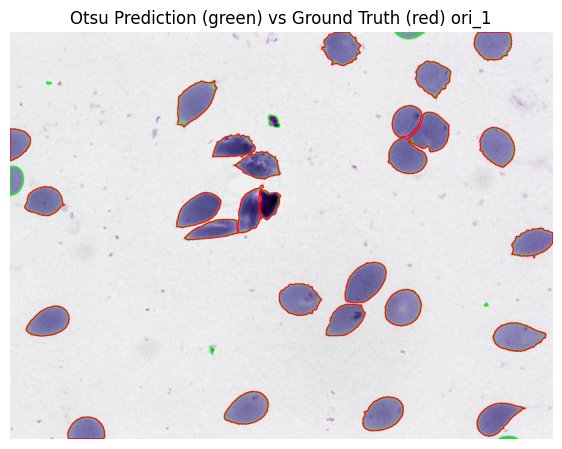

Performance for ori_2:
IoU (Intersection over Union): 0.9203
Dice Coefficient: 0.9585
--------------------


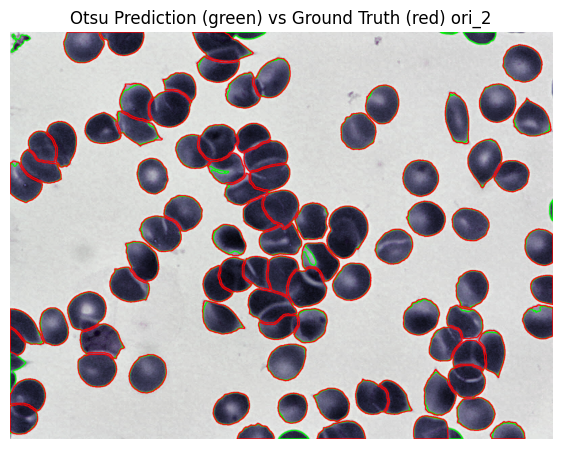

Performance for ori_3:
IoU (Intersection over Union): 0.8868
Dice Coefficient: 0.9400
--------------------


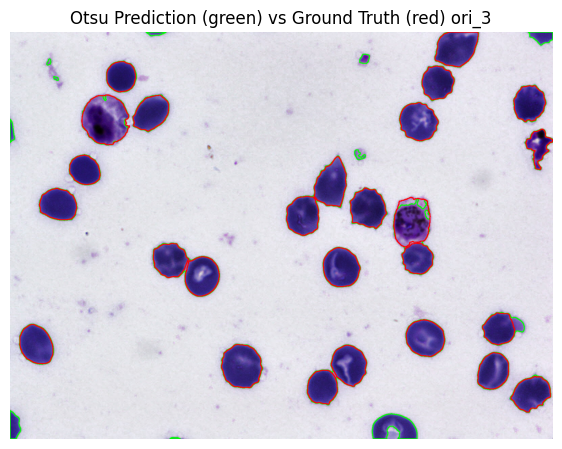

In [66]:
iou_results = []
dice_results = []
overlap_visualizations = []

for i in range(len(masks)):
    # --- Evaluasi Overlap (IoU & Dice) ---

    # Pastikan mask GT biner
    _, mask_bin = cv2.threshold(masks[i], 127, 255, cv2.THRESH_BINARY)

    # Ubah jadi boolean mask
    pred_mask_bool = (otsu_cleaned_results[i] > 0)
    gt_mask_bool   = (mask_bin > 0)

    # Hitung IoU dan Dice
    intersection = np.logical_and(pred_mask_bool, gt_mask_bool).sum()
    union = np.logical_or(pred_mask_bool, gt_mask_bool).sum()
    iou = intersection / union if union > 0 else 0.0

    dice = (2.0 * intersection) / (pred_mask_bool.sum() + gt_mask_bool.sum()) if (pred_mask_bool.sum() + gt_mask_bool.sum()) > 0 else 0.0

    iou_results.append(iou)
    dice_results.append(dice)

    print(f"Performance for ori_{i+1}:")
    print(f"IoU (Intersection over Union): {iou:.4f}")
    print(f"Dice Coefficient: {dice:.4f}")
    print("-" * 20)

    # --- Visualisasi Prediksi vs GT ---
    # Hijau = prediksi Otsu, Merah = Mask GT
    overlay_vis = cv2.cvtColor(np.array(original_images[i]), cv2.COLOR_RGB2BGR)

    # Kontur prediksi (hijau)
    for c in otsu_contours_results[i]:
        if cv2.contourArea(c) > 50:  # filter area kecil
            cv2.drawContours(overlay_vis, [c], -1, (0,255,0), 2)

    # Kontur GT (merah)
    for c in mask_contours_results[i]:
        if cv2.contourArea(c) > 50:
            cv2.drawContours(overlay_vis, [c], -1, (0,0,255), 2)

    overlap_visualizations.append(overlay_vis)

    plt.figure(figsize=(7,7))
    plt.imshow(cv2.cvtColor(overlay_vis, cv2.COLOR_BGR2RGB))
    plt.title(f"Otsu Prediction (green) vs Ground Truth (red) ori_{i+1}")
    plt.axis("off")
    plt.show()

# Perbandingan Hasil

In [67]:
import pandas as pd

data = {
    'Image': [f'ori_{i+1}' for i in range(len(original_images))],
    'Detected Cells (Otsu)': [len(contours) for contours in otsu_contours_results],
    'Ground Truth Cells (Mask)': [len(contours) for contours in mask_contours_results],
    'IoU': iou_results,
    'Dice Coefficient': dice_results
}

comparison_df = pd.DataFrame(data)
display(comparison_df)

Image  Detected Cells (Otsu)  Ground Truth Cells (Mask)       IoU  \
0  ori_1                     42                         27  0.918800   
1  ori_2                     51                         87  0.920252   
2  ori_3                     42                         26  0.886768   

   Dice Coefficient  
0          0.957682  
1          0.958470  
2          0.939986

# Analisis

> Dari tabel perbandingan hasil di atas, kita dapat melihat bahwa:

**Kinerja keseluruhan:**

> Koefisien IoU dan koefisien Dice cukup tinggi menunjukkan overlap yang baik antara Otsu dengan Ground Truth Cells (Mask). Hal ini menunjukkan bahwa pendekatan segmentasi berbasis Otsu berkinerja baik dalam mengidentifikasi seluruh area sel.

**Analisis Spesifik Gambar:**

> * **Gambar 1:** Jumlah sel yang terdeteksi (42) lebih tinggi daripada Ground Truth (27) dengan koefisien IoU (0,9188) dan Dice (0,9577). Hal ini menunjukkan meskipun segmentasi mendeteksi beberapa area non-sel atau membagi beberapa sel tunggal menjadi beberapa kontur, overlap area dengan Ground Truth masih kuat. Visualisasi membantu mengonfirmasi apakah kontur tambahan yang terdeteksi merupakan derau atau sel yang terfragmentasi.

> * **Gambar 2:** Citra ini memiliki perbedaan terbesar antara sel yang terdeteksi (51) dan Ground Truth (87) dengan koefisien IoU (0,9203) dan Dice (0,9585) tertinggi. Hal ini menunjukkan bahwa meskipun terdapat sejumlah besar sel yang terlewat dalam prediksi, sel terdeteksi yang ditemukan beroverlap dengan area dalam Ground Truth.

> * **Gambar 3:** Sel yang terdeteksi (42) lebih banyak daripada Ground Truth (26). Koefisien IoU (0,8868) dan Dice (0,9400) menunjukkan overlap baik meskipun sedikit lebih rendah nilainya. Hal ini dapat disebabkan oleh kombinasi deteksi beberapa area non-sel dan deteksi batas yang tidak seakurat citra lain.

**Kesimpulan:**

> Segmentasi berbasis Otsu menghasilkan mask keseluruhan yang baik antara overlap tinggi dengan Ground Truth. Namun, terdapat perbedaan jumlah sel yang terdeteksi dibandingkan dengan Ground Truth, yang bervariasi di antara citra. Metrik overlap yang tinggi (IoU dan Dice) menunjukkan bahwa area yang terdeteksi - meskipun jumlahnya berbeda - sebagian besar sesuai dengan area sel Ground Truth.